## Start of chapter 3

In [ ]:
import numpy as np
import torch
from torch import nn
import matplotlib.pyplot as plt
import pandas as pd
import sklearn
from sklearn.model_selection import train_test_split
# %matplotlib inline

In [ ]:
print(torch.cuda.is_available())

In [15]:
weight=0.7
bias=0.3
start=0
end=1
step=0.01
x=torch.arange(start,end,step).unsqueeze(dim=1)
y=weight*x+bias
x[:10],y[:10],len(x),len(y),x.shape,y.shape,len(y)

(tensor([[0.0000],
         [0.0100],
         [0.0200],
         [0.0300],
         [0.0400],
         [0.0500],
         [0.0600],
         [0.0700],
         [0.0800],
         [0.0900]]),
 tensor([[0.3000],
         [0.3070],
         [0.3140],
         [0.3210],
         [0.3280],
         [0.3350],
         [0.3420],
         [0.3490],
         [0.3560],
         [0.3630]]),
 100,
 100,
 torch.Size([100, 1]),
 torch.Size([100, 1]),
 100)

the ratio between the traning set and the validation set is <br>
*traning set : 60%-80%<br>
*validation set : 10%-20%<br>
*test set : 10%-20%<br>

In [16]:
train_split=int(0.8*len(x))
x_train=x[:train_split]
y_train=y[:train_split]
x_test=x[train_split:]
y_test=y[train_split:]
len(x_train),len(x_test),len(y_train),len(y_test)
# print(x_train)
# print(y_train)
# print(x_test)
# print(y_test)



(80, 20, 80, 20)

In [ ]:
# df=pd.read_csv('all_fuels_data.csv')
# df['diff']=df['open']-df['close']
# df.head()
#count each value in the commodities column are there in the dataset and convert it to precentage
# df['commodity'].value_counts(normalize=True)
# #do the same for ticker column
# df['ticker'].value_counts(normalize=True)

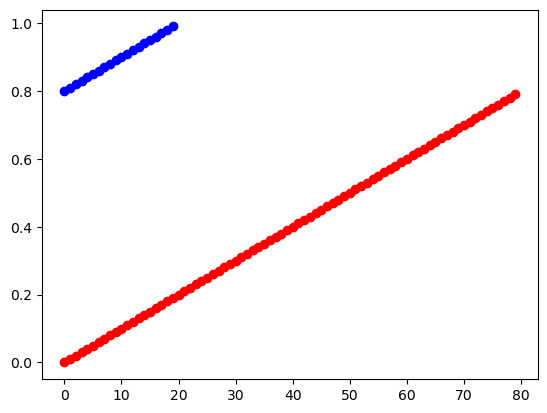

In [17]:
plt.plot(x_train, 'ro', label='Original data')
plt.plot(x_test, 'bo', label='Original data')

In [18]:
x_train,y_train,x_test,y_test =train_test_split(x,y,test_size=0.2)

In [19]:
y_test

tensor([[0.6010],
        [0.7270],
        [0.7970],
        [0.3490],
        [0.4610],
        [0.9300],
        [0.9860],
        [0.3980],
        [0.8740],
        [0.4190],
        [0.3210],
        [0.8670],
        [0.3350],
        [0.7200],
        [0.7550],
        [0.6150],
        [0.8530],
        [0.3560],
        [0.7410],
        [0.9580]])

In [20]:
#create a scatter plot of the data
class LinearRegression(nn.Module):
    def __init__(self):
        super(LinearRegression, self).__init__()
        self.weights = nn.Parameter(torch.randn(1, requires_grad=True, dtype=torch.float32))
        self.bias= nn.Parameter(torch.randn(1,requires_grad=True, dtype=torch.float32))
    def forward(self, x):
        return torch.matmul(x, self.weights)

In [24]:
#create an instance of the class
seed=torch.manual_seed(42)
input_size = 1
output_size = 1
model = LinearRegression()
#create a manual seed
list(model.state_dict().items())


[('weights', tensor([0.3367])), ('bias', tensor([0.1288]))]

tensor([0.0000, 0.0034, 0.0067, 0.0101, 0.0135, 0.0168, 0.0202, 0.0236, 0.0269,
        0.0303, 0.0337, 0.0370, 0.0404, 0.0438, 0.0471, 0.0505, 0.0539, 0.0572,
        0.0606, 0.0640, 0.0673, 0.0707, 0.0741, 0.0774, 0.0808, 0.0842, 0.0875,
        0.0909, 0.0943, 0.0976, 0.1010, 0.1044, 0.1077, 0.1111, 0.1145, 0.1178,
        0.1212, 0.1246, 0.1279, 0.1313, 0.1347, 0.1380, 0.1414, 0.1448, 0.1481,
        0.1515, 0.1549, 0.1582, 0.1616, 0.1650, 0.1683, 0.1717, 0.1751, 0.1784,
        0.1818, 0.1852, 0.1885, 0.1919, 0.1953, 0.1986, 0.2020, 0.2054, 0.2087,
        0.2121, 0.2155, 0.2188, 0.2222, 0.2256, 0.2289, 0.2323, 0.2357, 0.2391,
        0.2424, 0.2458, 0.2492, 0.2525, 0.2559, 0.2593, 0.2626, 0.2660, 0.2694,
        0.2727, 0.2761, 0.2795, 0.2828, 0.2862, 0.2896, 0.2929, 0.2963, 0.2997,
        0.3030, 0.3064, 0.3098, 0.3131, 0.3165, 0.3199, 0.3232, 0.3266, 0.3300,
        0.3333])


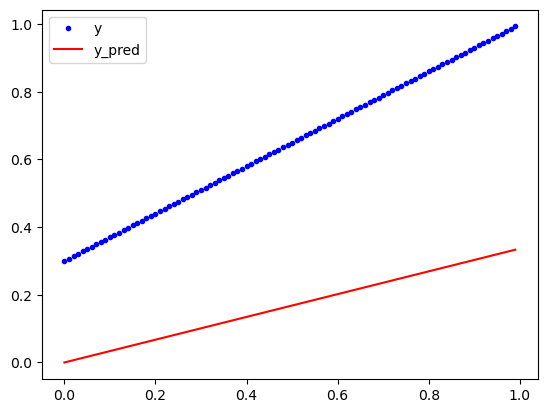

In [14]:
with torch.inference_mode():
    y_pred = model(x)
    print(y_pred)

#plot the y_pred
plt.plot(x, y, 'b.', label='y')
plt.plot(x.numpy(), y_pred.detach().numpy(), 'r-', label='y_pred')
plt.legend()
plt.show()

## Train the model

In [25]:
loss_fn=nn.L1Loss(reduction='mean')
loss=loss_fn(y_pred,y_train)
print(loss)
# print(x_train)
#setup optimizer
optimizer=torch.optim.SGD(model.parameters(),lr=1e-5)
#training loop
prev_loss=0
for t in range(1):
    model.train()
    #forward pass
    y_pred=model(x_train)
    #compute loss
    loss=loss_fn(y_pred,y_train)
    if(t==0):
        print("first iteration",loss.item())
        
    if t%100==99:
        print(t,(loss.item()-prev_loss)*100)
    #zero the gradients before running the backward pass
    optimizer.zero_grad()
    #backward pass
    loss.backward()
    #update the parameters
    optimizer.step()
    prev_loss=loss.item()
    

tensor(0.3940, grad_fn=<MeanBackward0>)
first iteration 0.3947792053222656


In [26]:
list(model.parameters())

[Parameter containing:
 tensor([0.3367], requires_grad=True),
 Parameter containing:
 tensor([0.1288], requires_grad=True)]